In [43]:
import pandas
import numpy as np
import pandas as pd

#from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline  
import seaborn as sns


In [44]:

df = pd.read_csv("hUSCensus1990raw50K.csv.bz2",compression = "bz2")



In [45]:
df_demo = pd.DataFrame()


df_demo["AGE"] = df[["AGE"]].copy()
df_demo["INCOME"] = df[["INCOME" + str(i) for i in range(1,8)]].sum(axis = 1)

df_demo["YEARSCH"] = df[["YEARSCH"]].copy()
df_demo["ENGLISH"] = df[["ENGLISH"]].copy()
df_demo["FERTIL"] = df[["FERTIL"]].copy()
df_demo["YRSSERV"] = df[["YRSSERV"]].copy()



/Users/Ercan/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Number of clusters: 2
Silhouette Coefficient: 0.284


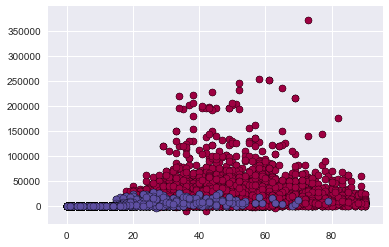

Number of clusters: 3
Silhouette Coefficient: 0.309


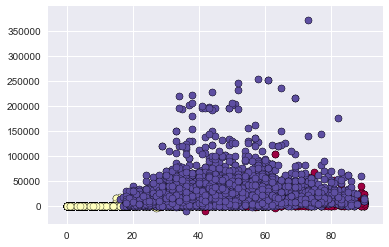

Number of clusters: 4
Silhouette Coefficient: 0.339


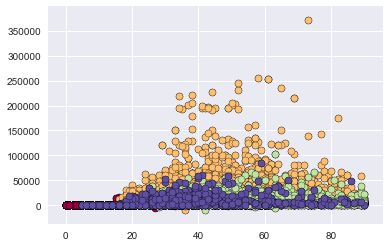

Number of clusters: 5
Silhouette Coefficient: 0.351


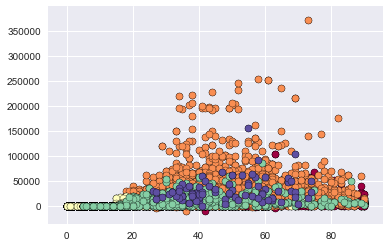

Number of clusters: 6
Silhouette Coefficient: 0.359


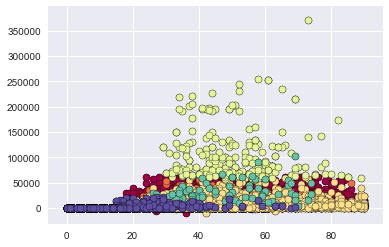

Number of clusters: 7
Silhouette Coefficient: 0.360


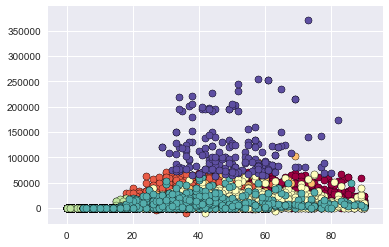

Number of clusters: 8
Silhouette Coefficient: 0.365


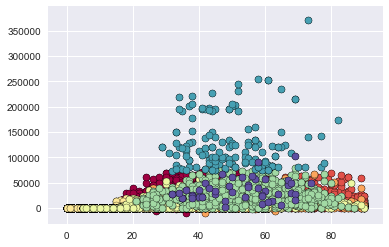

Number of clusters: 9
Silhouette Coefficient: 0.341


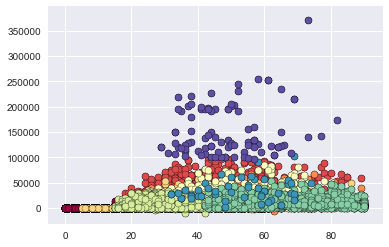

In [46]:

X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_db = sc.fit_transform(X)


for i in range(2,10):

    n_clusters = i

    labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)




    print('Number of clusters: %d' % n_clusters)

    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X_db, labels))

    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = 'k'

        class_member_mask = (labels == k)

        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')
        
    plt.show()

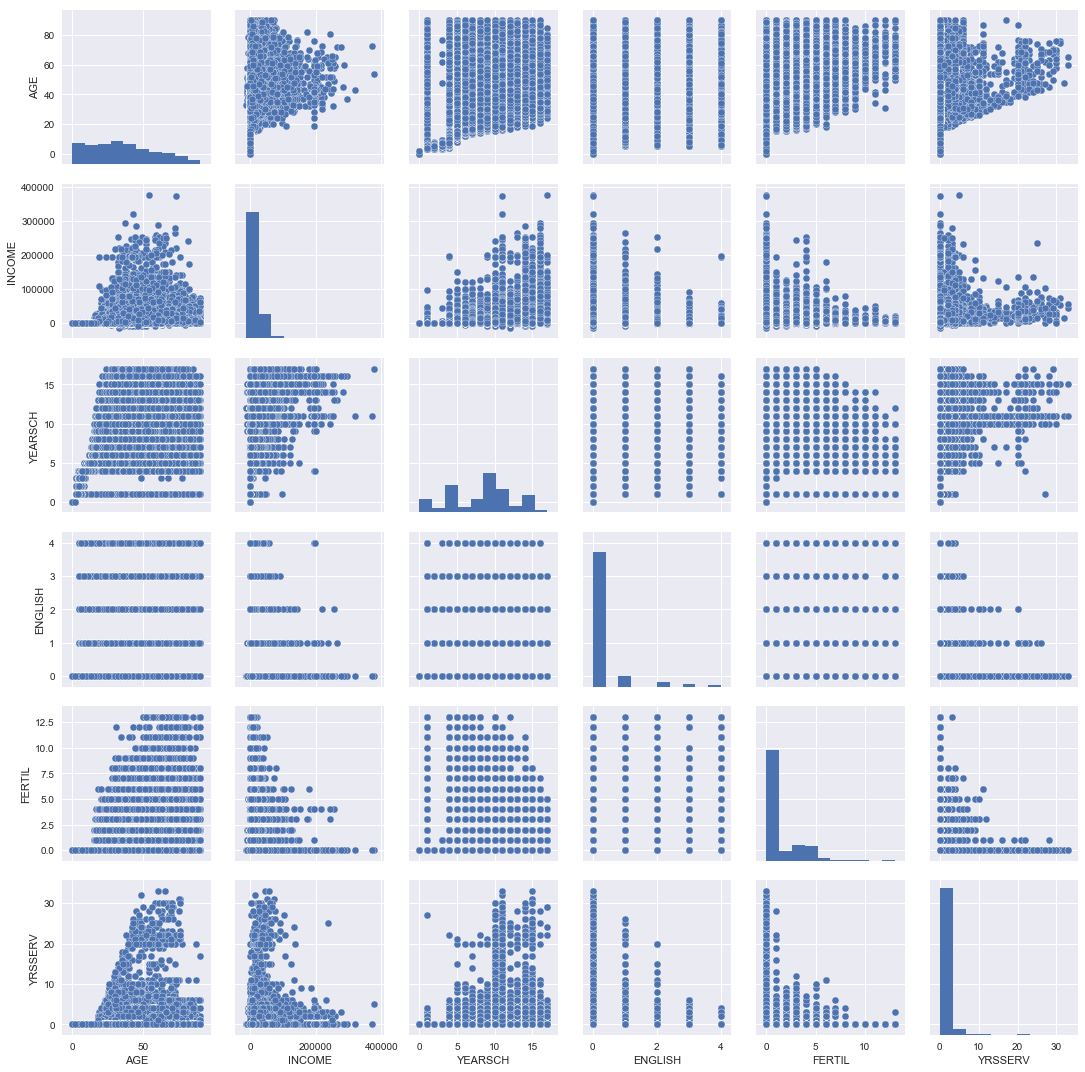

In [47]:
g = sns.pairplot(df_demo)


In [ ]:
data = []
cluster_dic= dict((x, list()) for x in range(2,10))

for j in range(0,10):  
    X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]
    from sklearn import metrics
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_db = sc.fit_transform(X)
    for i in range(2,10):
        n_clusters = i
        labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)        
        s_score = metrics.silhouette_score(X_db,labels)
        data.append ([s_score,i])  
        cluster_dic[n_clusters].append("%0.3f"%s_score) 

print(cluster_dic)       
df = pd.DataFrame(data)
df.columns = ["s_score","n_cluster"]
sns.pointplot(x ="n_cluster",y ="s_score",data=df, join=False)
        
print(data)

/Users/Ercan/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [ ]:
from sklearn.cluster import AgglomerativeClustering
data = []
cluster_dic= dict((x, list()) for x in range(2,10))

for j in range(0,10):  
    X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]
    from sklearn import metrics
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_db = sc.fit_transform(X)
    for i in range(2,10):
        n_clusters = i
        labels = AgglomerativeClustering(n_clusters = n_clusters).fit_predict(X_db)        
        s_score = metrics.silhouette_score(X_db,labels)
        data.append ([s_score,i])
        cluster_dic[n_clusters].append("%0.3f"%s_score) 

print(cluster_dic) 
df = pd.DataFrame(data)
df.columns = ["s_score","n_cluster"]
sns.pointplot(x ="n_cluster",y ="s_score",data=df, join=False)
        
print(data)